**Assignment 3**

_This notebook contains simple starter code to show loading and displaying a pair of test images and the associated flow._

### Student name: Yansong Li
### Student number: 300083962

In [1]:
# Adapted helper routine from Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow.

# Common imports
import numpy as np
import os
import skimage 
from google.colab import drive
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

drive.mount('/content/gdrive',force_remount=True)
root_path = '/content/gdrive/My Drive/Colab_Notebooks'

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/Colab_Notebooks/images"
NB_ID = "assignment3"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Mounted at /content/gdrive


Let's load the image pairs and the corresponding flow 

In [0]:
train_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_train.npy'))

In [0]:
train_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_train.npy'))

In [4]:
print('Size of training images: {0} x {1} x {2} x {3}\n'.format(*train_images.shape))
print('Size of flow results: {0} x {1} x {2} x {3}\n'.format(*train_flows.shape))

Size of training images: 1860 x 6 x 64 x 64

Size of flow results: 1860 x 4 x 64 x 64



For RGB images, we need the channels last, e.g., 64x64x3.

In [0]:
def make_RGB(img_arr, img_no, seq_no ): 
    test = np.zeros(img_arr.shape[2:]+(3,))  
    test[:,:,2] = img_arr[img_no,0+3*seq_no,:,:] 
    test[:,:,1] = img_arr[img_no,1+3*seq_no,:,:] 
    test[:,:,0] = img_arr[img_no,2+3*seq_no,:,:]
    return test

In [0]:
def make_Greyscale(img_arr, img_no, seq_no ): 
    return img_arr[img_no,seq_no,:,:] 

Saving figure example_data


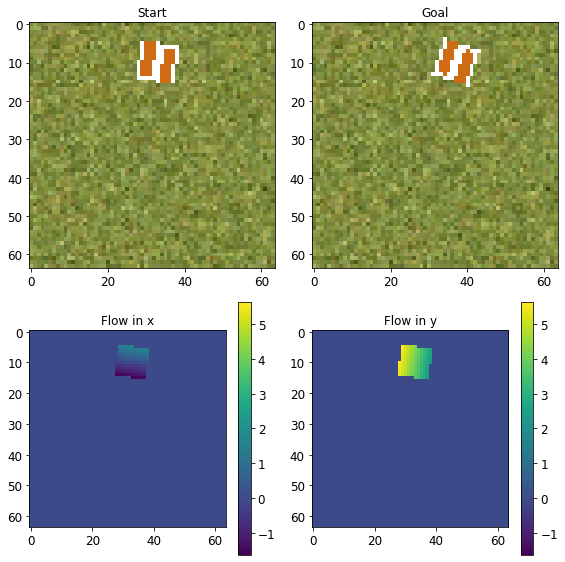

In [7]:
img_num = 101

fig, axes = plt.subplots(2, 2,figsize=(8,8))
axes[0, 0].imshow(make_RGB(train_images, img_num, 0 ))
axes[0, 0].set_title('Start')    

axes[0, 1].imshow(make_RGB(train_images, img_num, 1 ))
axes[0, 1].set_title('Goal')    

# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

im = axes[1, 0].imshow(make_Greyscale(train_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[1, 0].set_title('Flow in x')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(make_Greyscale(train_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[1, 1].set_title('Flow in y')
fig.colorbar(im,ax=axes[1, 1])

save_fig("example_data")


In [8]:
import numpy as np
import os
train_rot_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_train.npy'))
train_rot_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_train.npy'))
print('The size of train_rot_images is:', np.shape(train_rot_images))
print('The size of train_rot_flows is:', np.shape(train_rot_flows))

The size of train_rot_images is: (1860, 6, 64, 64)
The size of train_rot_flows is: (1860, 4, 64, 64)


## Data Preparation

1. Iteratively load start and goal images by using make_RGB
2. Concatenate start and goal images together by setting up axis = -1
3. Iteratively load start and flow graph by using make_Greyscale
4. Concatenate start and goal flow graph by setting up axis = -1

In [9]:
# upload test images
test_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_test.npy'))
test_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_test.npy'))
print('Size of testing images: {0} x {1} x {2} x {3}\n'.format(*train_images.shape))
print('Size of flow results: {0} x {1} x {2} x {3}\n'.format(*train_flows.shape))

Size of testing images: 1860 x 6 x 64 x 64

Size of flow results: 1860 x 4 x 64 x 64



In [10]:
# transfer all training data and test data
def Get_all_images(images):
    Images_list = []
    total_length = np.shape(images)[0]
    for m in range(total_length):
        images_start = make_RGB(images, m, 0)
        images_end = make_RGB(images, m, 1)
# -1 stands for “infer this from the other dimensions”. 
# This behavior is similar to that of -1 in numpy’s or [] for MATLAB’s reshape: 
# this dimension is calculated to keep the overall element count the same as in the bottom layer. 
# At most one -1 can be used in a reshape operation.
        images_set = np.concatenate([images_start, images_end], axis = -1)
        Images_list.append(images_set)
    return Images_list



def Get_all_label(Tlabel):
    Label_list = []
    length = len(Tlabel)
    for i in range(length):
        label_start = make_Greyscale(Tlabel,i,0)
        label_goal = make_Greyscale(Tlabel,i,1)
        label_start= label_start[:,:,np.newaxis]
        label_goal= label_goal[:,:,np.newaxis]
        NewLabel = np.concatenate([label_start,label_goal],axis = -1)
        Label_list.append(NewLabel)
    return Label_list


Image_rot_train_list = np.array(Get_all_images(train_images))
flow_rot_train_list = np.array(Get_all_label(train_flows))
Image_rot_test_list = np.array(Get_all_images(test_images))
flow_rot_test_list = np.array(Get_all_label(test_flows))




# print("The sample optical flow graph after reducing number of channel is as following")
# fig = plt.figure(figsize = (16, 4))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax1.imshow(k[..., 0])
# plt.suptitle("The flow x and flow y are as following")
# ax2.imshow(k[..., 1])
# plt.show()

print("The shape of Rot Train images is:",np.shape(Image_rot_train_list))
print("The shape of Rot Train label is:",np.shape(flow_rot_train_list))
print("The shape of Rot Test images is:",np.shape(Image_rot_test_list))
print("The shape of Rot Test images is:",np.shape(flow_rot_test_list))

The shape of Rot Train images is: (1860, 64, 64, 6)
The shape of Rot Train label is: (1860, 64, 64, 2)
The shape of Rot Test images is: (444, 64, 64, 6)
The shape of Rot Test images is: (444, 64, 64, 2)


## Network Design

1. Using mean square error as Loss measure
2. Setting up Measure by calculating the distance between groundtruth value and prediction value and for the value lower than 3.e-3 would be regarded as true prediction.
3. Initializing the CNN model by setting up parameter input_shape = (64, 64, 6), number of filter = 64 and kernel_size = (3, 3).
4. Downsizing all the iuput images by using convolution2D with stride = (2, 2) and then upsizing all the images with deconvolution layer by using convolution2DTranspose with stride = (2, 2).
5. Configure 'linear' as last layer activation function.

In [11]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau
import tensorflow.keras.layers as L
from tensorflow.keras.optimizers import Adam
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'

def Measure(y_true, y_pred):
    value = K.abs(y_true - y_pred)
    false_pred = K.cast(K.greater(value, 3.e-3), 'float32')
    whole_ones = K.ones_like(value) # * weight_vector
    return K.sum(1. - false_pred) / K.sum(whole_ones)

# input image dimensions
img_rows, img_cols, num_channel = 64, 64, 6
# number of convolutional filters to use
nb_filters = 64
# convolution kernel size
kernel_size = (3, 3)

def CNN():
    model = Sequential()
    model.add(L.Conv2D(nb_filters, kernel_size, strides=(1, 1), padding='same', activation='relu', input_shape=(img_rows, img_cols, num_channel)))
    model.add(L.Conv2D(nb_filters*2, kernel_size, strides=(2, 2), padding='same', activation='relu'))
    model.add(L.Conv2D(nb_filters*4, kernel_size, strides=(1, 1), padding='same', activation='relu'))
    model.add(L.Conv2D(nb_filters*8, kernel_size, strides=(2, 2), padding='same', activation='relu'))
    model.add(L.Conv2DTranspose(nb_filters*4, kernel_size, strides=(2, 2), padding='same', activation='relu'))
    model.add(L.Conv2DTranspose(nb_filters*2, kernel_size, strides=(2, 2), padding='same', activation='relu'))
    model.add(L.Conv2D(2, kernel_size, strides=(1, 1), padding='same', activation='linear'))
    model.compile(loss="mse", optimizer=Adam(lr=0.0001), metrics=[Measure])
    return model
CNN = CNN()
CNN.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        3520      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 512)       1180160   
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 256)       1179904   
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 128)       295040    
_________________________________________

### Training parameter

1. Adding learning rate decay with factor = 0.8
2. Fitting the model with training data.
3. Setting up epochs = 15, batch_size = 10

In [12]:
decay = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=3, min_lr=1e-5)
CNN.fit(Image_rot_train_list, flow_rot_train_list, batch_size=10, epochs=15,callbacks=[decay])

Train on 1860 samples
Epoch 1/15
1860/1860 [==============================] - 14s 7ms/sample - loss: 0.5851 - Measure: 0.0736
Epoch 2/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.3047 - Measure: 0.0745
Epoch 3/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.2559 - Measure: 0.0829
Epoch 4/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.2298 - Measure: 0.1039
Epoch 5/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.2113 - Measure: 0.1410
Epoch 6/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.1968 - Measure: 0.1446
Epoch 7/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.1857 - Measure: 0.1421
Epoch 8/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.1762 - Measure: 0.1647
Epoch 9/15
1860/1860 [==============================] - 12s 6ms/sample - loss: 0.1689 - Measure: 0.1531
Epoch 10/15
1860/1860 [===================

### Evaluate the model 

In [13]:
scores = CNN.evaluate(Image_rot_test_list, flow_rot_test_list, verbose = 1)
print("loss, acc, measure", scores)

444/444 [==============================] - 2s 5ms/sample - loss: 0.1346 - Measure: 0.1490
loss, acc, measure [0.13464726266023275, 0.14896584]


Saving figure basic_result


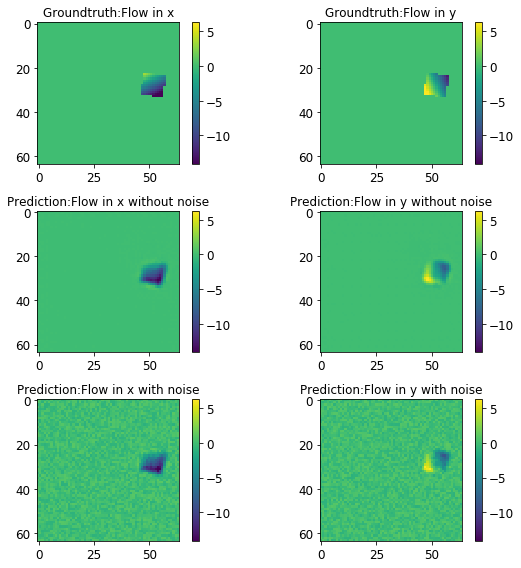

In [14]:
img_num = 200
flow_result = CNN.predict(Image_rot_test_list[img_num:img_num+1,:,:,:])

fig, axes = plt.subplots(3, 2,figsize=(8,8))


# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_min = np.min([fl_min,np.min(flow_result[0,:,:,0:2])])
fl_max = np.max([fl_max,np.max(flow_result[0,:,:,0:2])])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)


flow_result1 = np.squeeze(flow_result)


# noise free flows
im = axes[0, 0].imshow(make_Greyscale(test_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[0, 0].set_title('Groundtruth:Flow in x')
fig.colorbar(im,ax=axes[0, 0])



im = axes[0, 1].imshow(make_Greyscale(test_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[0, 1].set_title('Groundtruth:Flow in y')
fig.colorbar(im,ax=axes[0, 1])

im = axes[1, 0].imshow(flow_result1[..., 0])
im.set_norm(fl_norm)
axes[1, 0].set_title('Prediction:Flow in x without noise')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(flow_result1[..., 1])
im.set_norm(fl_norm)
axes[1, 1].set_title('Prediction:Flow in y without noise')
fig.colorbar(im,ax=axes[1, 1])


flow_result2 = flow_result[0:,:,:,0:2] + 2*np.random.rand(1,64,64,2) - 1
flow_result3 = np.squeeze(flow_result2)
# noisy flows
im = axes[2, 0].imshow(flow_result3[..., 0])
im.set_norm(fl_norm)
axes[2, 0].set_title('Prediction:Flow in x with noise')
fig.colorbar(im,ax=axes[2, 0])

im = axes[2, 1].imshow(flow_result3[..., 1])
im.set_norm(fl_norm)
axes[2, 1].set_title('Prediction:Flow in y with noise')
fig.colorbar(im,ax=axes[2, 1])

save_fig("basic_result")

### Conclusion

In [ ]:
import tensorflow.keras.applications as App
import tensorflow
import tensorflow.keras.layers as TL
from tensorflow.keras.optimizers import Adam
train_mix_train_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_images_train.npy'))
train_mix_train_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_flows_train.npy'))
test_mix_test_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_images_test.npy'))
test_mix_test_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_flows_test.npy'))
Image_mix_train_list = np.array(Get_all_images(train_mix_train_images))
flow_mix_train_list = np.array(Get_all_label(train_mix_train_flows))
Image_mix_test_list = np.array(Get_all_images(test_mix_test_images))
flow_mix_test_list = np.array(Get_all_label(test_mix_test_flows))
print("The shape of Image_mix_train_list", np.shape(Image_mix_train_list))
print("The shape of flow_mix_train_list", np.shape(flow_mix_train_list))
print("The shape of Image_mix_test_list", np.shape(Image_mix_test_list))
print("The shape of flow_mix_test_list", np.shape(flow_mix_test_list))

In [ ]:
vgg_model = App.vgg16.VGG16(input_shape = (img_rows, img_cols, 3),include_top=False)
vggmodel = tensorflow.keras.Sequential()
pool_layer = [3, 6, 10]
for i in range(12):
    if i not in pool_layer:
        vggmodel.add(vgg_model.layers[i])
vggmodel.trainable = False
vggmodel.summary()

In [ ]:
def VGG_CNN():
    L1 = L.Conv2D(64, (3, 3), strides=(1, 1), padding='same', \
                   activation='relu', input_shape=(64, 64, 6))
    L2 = L.Conv2D(3, (3, 3), strides=(1, 1), padding='same', \
                   activation='relu')

    regression1 = L.Conv2D(nb_filters*8, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu')
    regression2 = L.Conv2D(nb_filters*4, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu')
    regression3 = L.Conv2DTranspose(nb_filters*2 , (3, 3), strides=(2, 2), padding='same', \
                   activation='relu')
    regression4 = L.Conv2DTranspose(nb_filters , (3, 3), strides=(2, 2), padding='same', \
                   activation='relu')
    regression5 = L.Conv2D(2 , (3, 3), strides=(1, 1), padding='same', \
                   activation='linear')

    New_model = tensorflow.keras.Sequential([L1, L2, vggmodel,regression1, regression2,
                                regression3, regression4, regression5])
    New_model.compile(loss="mse", optimizer=Adam(lr=0.0001), metrics=[Measure])
    return New_model

New_model = VGG_CNN()
New_model.summary()

In [ ]:
New_model.fit(Image_rot_train_list, flow_rot_train_list, batch_size=10, epochs=10,callbacks=[decay])

In [ ]:
history = New_model.evaluate(Image_rot_test_list, flow_rot_test_list, verbose= 1)
print("The loss and Measure for rot data", history)

In [ ]:
img_num = 200
flow_result = New_model.predict(Image_rot_test_list[img_num:img_num+1,:,:,:])

fig, axes = plt.subplots(3, 2,figsize=(8,8))


# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_min = np.min([fl_min,np.min(flow_result[0,:,:,0:2])])
fl_max = np.max([fl_max,np.max(flow_result[0,:,:,0:2])])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)


flow_result1 = np.squeeze(flow_result)


# noise free flows
im = axes[0, 0].imshow(make_Greyscale(test_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[0, 0].set_title('Groundtruth:Flow in x')
fig.colorbar(im,ax=axes[0, 0])



im = axes[0, 1].imshow(make_Greyscale(test_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[0, 1].set_title('Groundtruth:Flow in y')
fig.colorbar(im,ax=axes[0, 1])

im = axes[1, 0].imshow(flow_result1[..., 0])
im.set_norm(fl_norm)
axes[1, 0].set_title('Prediction:Flow in x without noise')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(flow_result1[..., 1])
im.set_norm(fl_norm)
axes[1, 1].set_title('Prediction:Flow in y without noise')
fig.colorbar(im,ax=axes[1, 1])


flow_result2 = flow_result[0:,:,:,0:2] + 2*np.random.rand(1,64,64,2) - 1
flow_result3 = np.squeeze(flow_result2)
# noisy flows
im = axes[2, 0].imshow(flow_result3[..., 0])
im.set_norm(fl_norm)
axes[2, 0].set_title('Prediction:Flow in x with noise')
fig.colorbar(im,ax=axes[2, 0])

im = axes[2, 1].imshow(flow_result3[..., 1])
im.set_norm(fl_norm)
axes[2, 1].set_title('Prediction:Flow in y with noise')
fig.colorbar(im,ax=axes[2, 1])

save_fig("basic_result")

In [ ]:
New_model.fit(Image_mix_train_list, flow_mix_train_list, batch_size=10, epochs=10,callbacks=[decay])

In [ ]:
history = New_model.evaluate(Image_mix_test_list, flow_mix_test_list, verbose= 1)
print("The loss and Measure for mix data", history)

In [ ]:
img_num = 100
test_mix_test_flows_temp = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_flows_test.npy'))
flow_result = New_model.predict(Image_mix_test_list[img_num:img_num+1,:,:,:])

fig, axes = plt.subplots(3, 2,figsize=(8,8))


# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_min = np.min([fl_min,np.min(flow_result[0,:,:,0:2])])
fl_max = np.max([fl_max,np.max(flow_result[0,:,:,0:2])])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)


flow_result1 = np.squeeze(flow_result)


# noise free flows
im = axes[0, 0].imshow(make_Greyscale(test_mix_test_flows_temp, img_num, 0 ))
im.set_norm(fl_norm)
axes[0, 0].set_title('Groundtruth:Flow in x')
fig.colorbar(im,ax=axes[0, 0])



im = axes[0, 1].imshow(make_Greyscale(test_mix_test_flows_temp, img_num, 1 ))
im.set_norm(fl_norm)
axes[0, 1].set_title('Groundtruth:Flow in y')
fig.colorbar(im,ax=axes[0, 1])

im = axes[1, 0].imshow(flow_result1[..., 0])
im.set_norm(fl_norm)
axes[1, 0].set_title('Prediction:Flow in x without noise')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(flow_result1[..., 1])
im.set_norm(fl_norm)
axes[1, 1].set_title('Prediction:Flow in y without noise')
fig.colorbar(im,ax=axes[1, 1])


flow_result2 = flow_result[0:,:,:,0:2] + 2*np.random.rand(1,64,64,2) - 1
flow_result3 = np.squeeze(flow_result2)
# noisy flows
im = axes[2, 0].imshow(flow_result3[..., 0])
im.set_norm(fl_norm)
axes[2, 0].set_title('Prediction:Flow in x with noise')
fig.colorbar(im,ax=axes[2, 0])

im = axes[2, 1].imshow(flow_result3[..., 1])
im.set_norm(fl_norm)
axes[2, 1].set_title('Prediction:Flow in y with noise')
fig.colorbar(im,ax=axes[2, 1])

save_fig("basic_result")

In [ ]:
from tensorflow.keras.models import Model

def seperate(Timages):
    Image_list_start =[]
    Image_list_end =[]
    length = len(Timages)
    for i in range(length):
        image_start = make_RGB(Timages,i,0)
        image_goal = make_RGB(Timages,i,1)
        Image_list_start.append(image_start)
        Image_list_end.append(image_goal)
    return Image_list_start,Image_list_end

train_images_start, train_images_end = seperate(train_images)
test_images_start, test_images_end = seperate(test_images)
print("the shape of train_images_start:",np.shape(train_images_start))
print("the shape of train_images_end:",np.shape(train_images_end))
print("the shape of test_images_start:",np.shape(test_images_start))
print("the shape of test_images_end:",np.shape(test_images_end))

def siamese_model():
    start = TL.Input(shape = (64,64,3))
    end = TL.Input(shape =(64,64,3))
    start_image_layer = TL.Conv2D(nb_filters,kernel_size,strides=(1,1),padding='same',input_shape=(64,64,6),activation = 'relu')(start)
    l2_start = TL.Conv2D(nb_filters*2,kernel_size,strides=(2,2),padding='same',activation = 'relu')(start_image_layer)
    goal_image_layer = TL.Conv2D(nb_filters,kernel_size,strides=(1,1),padding='same',input_shape=(64,64,6),activation = 'relu')(end)
    l2_end = TL.Conv2D(nb_filters*2,kernel_size,strides=(2,2),padding='same',activation = 'relu')(goal_image_layer)
    l2  = TL.Add()([l2_start,l2_end])
    l3 = TL.Conv2D(nb_filters*4,kernel_size,strides=(1,1),padding='same',activation = 'relu')(l2)
    l4 = TL.Conv2D(nb_filters*8,kernel_size,strides=(2,2),padding='same',activation = 'relu')(l3)
    l5 = TL.Conv2DTranspose(nb_filters*4,kernel_size,strides=(2,2),padding='same',activation = 'relu')(l4)
    l6 = TL.Conv2DTranspose(nb_filters*2,kernel_size,strides=(1,1),padding='same',activation = 'relu')(l5)
    l7 = TL.Conv2DTranspose(2,kernel_size,strides=(2,2),padding='same',activation = 'linear')(l6)
    model = Model(inputs=[start, end], outputs = l7)
    model.summary()
    model.compile(loss = "mse", optimizer = Adam(lr = 0.0001), metrics=[Measure])
    return model
siamese_model = siamese_model()


In [ ]:
decay = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=3, min_lr=1e-5)
history = siamese_model.fit(x=[train_images_start, train_images_end], y = flow_rot_train_list, batch_size=10, epochs=15,callbacks=[decay])

In [ ]:
history = siamese_model.evaluate(x=[test_images_start, test_images_end], y = flow_rot_test_list, verbose= 1)
print("The loss and Measure", history)

In [ ]:
img_num = 200
flow_result = New_model.predict(Image_rot_test_list[img_num:img_num+1,:,:,:])

fig, axes = plt.subplots(3, 2,figsize=(8,8))


# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_min = np.min([fl_min,np.min(flow_result[0,:,:,0:2])])
fl_max = np.max([fl_max,np.max(flow_result[0,:,:,0:2])])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)


flow_result1 = np.squeeze(flow_result)


# noise free flows
im = axes[0, 0].imshow(make_Greyscale(test_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[0, 0].set_title('Groundtruth:Flow in x')
fig.colorbar(im,ax=axes[0, 0])



im = axes[0, 1].imshow(make_Greyscale(test_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[0, 1].set_title('Groundtruth:Flow in y')
fig.colorbar(im,ax=axes[0, 1])

im = axes[1, 0].imshow(flow_result1[..., 0])
im.set_norm(fl_norm)
axes[1, 0].set_title('Prediction:Flow in x without noise')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(flow_result1[..., 1])
im.set_norm(fl_norm)
axes[1, 1].set_title('Prediction:Flow in y without noise')
fig.colorbar(im,ax=axes[1, 1])


flow_result2 = flow_result[0:,:,:,0:2] + 2*np.random.rand(1,64,64,2) - 1
flow_result3 = np.squeeze(flow_result2)
# noisy flows
im = axes[2, 0].imshow(flow_result3[..., 0])
im.set_norm(fl_norm)
axes[2, 0].set_title('Prediction:Flow in x with noise')
fig.colorbar(im,ax=axes[2, 0])

im = axes[2, 1].imshow(flow_result3[..., 1])
im.set_norm(fl_norm)
axes[2, 1].set_title('Prediction:Flow in y with noise')
fig.colorbar(im,ax=axes[2, 1])

save_fig("basic_result")